In [16]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = './housing_price/data'
df = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))

# 1. Column value information

In [7]:
for column in df.columns:
    print ("For the column:", column)
    print ("The unique values are:", df[column].nunique())
    print ("Whether there are null value:", df[column].isna().any()) # use isna().sum() to count total nan value
    print ("The value counts are: ", df[column].value_counts())

For the column: Id
The unique values are: 1460
Whether there are null value: False
The value counts are:  1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
For the column: MSSubClass
The unique values are: 15
Whether there are null value: False
The value counts are:  20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45 

# 2. Datatypes

In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# 3. Duplicated columns

In [10]:
### Drop the column with only one value 
single_value_column = []
for column in df.columns.tolist():
    if df[column].nunique() == 1:
        single_value_column.append(column)
df.drop(single_value_column, axis=1, inplace=True)

In [13]:
### Plot the correlation among columns
corr = df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


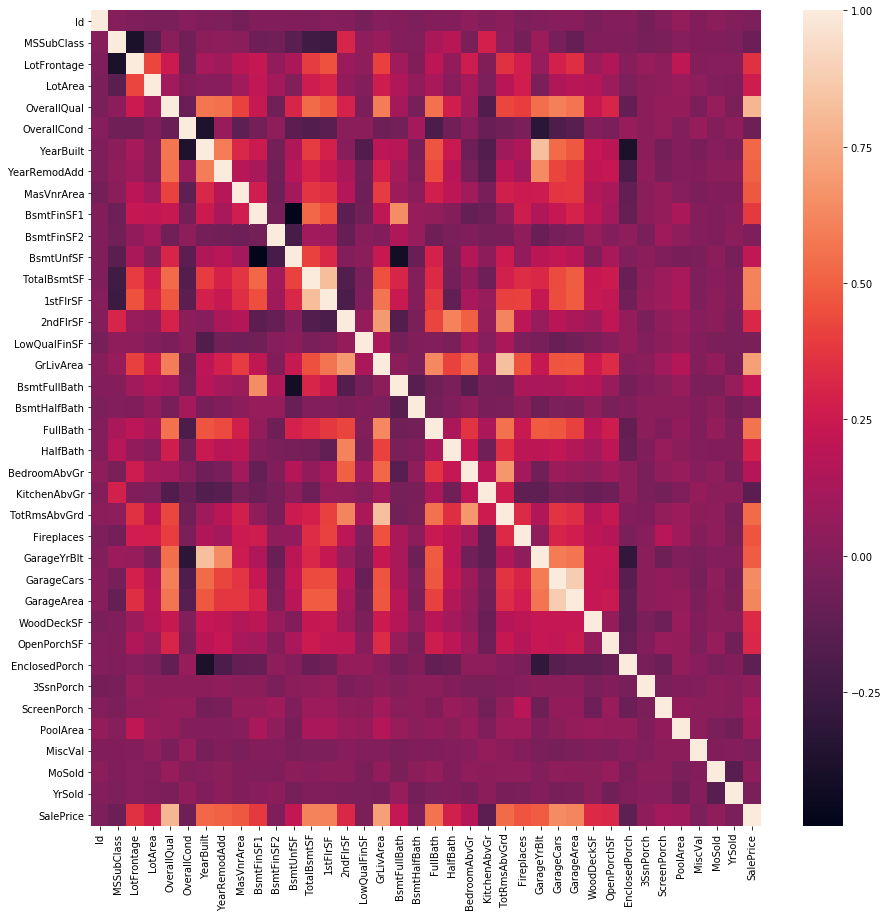

In [20]:
plt.figure(figsize= (15,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 4. Seasonality

In [27]:
df_news = pd.read_csv('./data/JPY-News.csv')
df_news = df_news[['News Time', 'Title']]

In [33]:
df_news['News Time'] = pd.to_datetime(df_news['News Time'])

In [43]:
df_news['hour'] = df_news['News Time'].dt.ceil('h')

In [49]:
df_news['daily_hour'] = df_news['hour'].dt.hour

In [93]:
df_hourly = df_news.groupby('hour')['Title'].count().reset_index() 
# To reset_index() in order to make into a dataframe, otherwise it will only be a Series

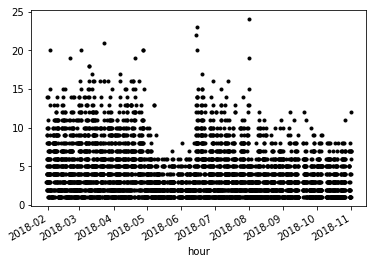

In [48]:
df_hourly.plot(style = 'k.')

In [50]:
df_daily_hour = df_news.groupby('daily_hour')['Title'].count()

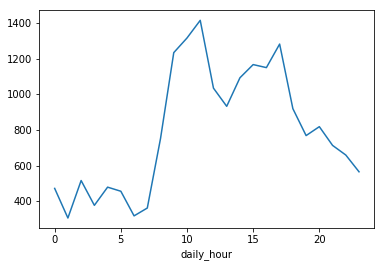

In [55]:
df_daily_hour.plot()

In [100]:
#### Differencing
df_hourly['hour_diff'] = df_hourly.hourly_count.diff(1)

In [95]:
df_hourly.columns = ['Time','hourly_count']

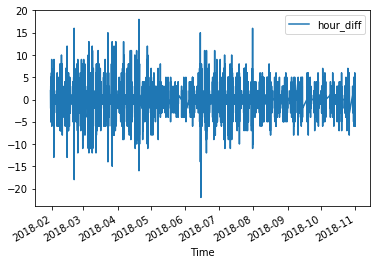

In [102]:
df_hourly.plot('Time','hour_diff')

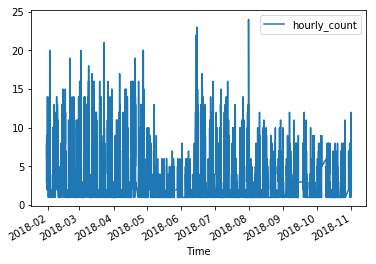

In [103]:
df_hourly.plot('Time','hourly_count')

In [123]:
import statsmodels.api as sm
df_hourly = df_hourly.set_index(pd.DatetimeIndex(df_hourly['Time']))
result = sm.tsa.seasonal_decompose(df_hourly['hourly_count'], model='multiplicative')

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

# 5. Moving Averages

In [128]:
### Moving average for each 2 h
# With defined window
ma_2w = df_hourly['hourly_count'].rolling(window = 2).mean()
mm_2w = df_hourly['hourly_count'].rolling(window = 2).median()

In [146]:
# With specific time 
ma_2d = df_hourly['hourly_count'].rolling(window = '2h').mean()

In [137]:
# Using resample to manipulate data
daily = df_hourly.resample('D').mean()

,hourly_count,hour_diff
Time,,
2018-01-30,5.454545,-0.100000
2018-01-31,6.333333,0.041667
2018-02-01,4.083333,-0.083333
2018-02-02,5.826087,0.043478
2018-02-03,1.875000,-0.125000
2018-02-04,1.166667,0.000000
2018-02-05,5.263158,0.052632
2018-02-06,6.695652,0.260870
2018-02-07,6.458333,-0.208333


# 6. Data Transformation

In [152]:
### Hypercube transformation --- used for Gausian distributed data

df_hourly['count_hyper_transformed'] = df_hourly['hourly_count'].transform(lambda x: (x - x.mean()) / x.std())

In [153]:
### Min-max transformation 

df_hourly['count_minmax_transformed'] = df_hourly['hourly_count'].transform(lambda x: (x - x.min()) / (x.max()-x.min()))

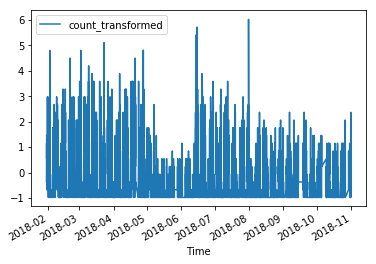

In [150]:
df_hourly.plot('Time','hourly_count')
df_hourly.plot('Time','count_transformed')